**Άσκηση 2.α**
<br><br>

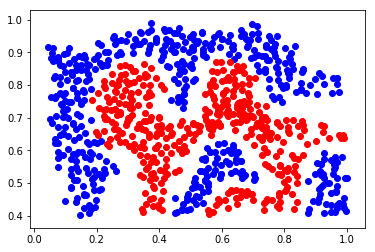

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Διαβάζω το dataset, το οποίο έχει ένα συγκεκριμέν format
# Διαβάζω γραμμή-γραμμή (εγγραφή-εγγραφή) το αρχείο και αποσπάω από κάθε formated γραμμή
# την κλάση στην οποία ανήκει η εγγραφή, την τιμή του χ άξονα και την τιμή του y άξονα της εγγραφής
file = open("d:/Documents/ml/hw5/homework5_SVM/ex2Data/ex2a.txt" , "r")

labels = []
dataX = []
dataY = []

lines = file.readlines()
N = np.shape(lines)[0]


for i in range(N):
    splittedLines = [lines[i].split()] # 1χ3
    labels.append(splittedLines[0][0])
    dataX.append(splittedLines[0][1].split("1:"))
    dataY.append(splittedLines[0][2].split("2:"))
file.close()


# Διαχωρίζω τις εγγραφές ανάλογα με την κλάση που ανήκουν και σχεδιάζω με άλλο χρώμα τις εγγραφές της κάθε κλάσης
for i in range(N):
    if int(labels[i]) == 1:
        plt.scatter(float(dataX[i][1]) , float(dataY[i][1]) , color='blue')
    if int(labels[i]) == -1:
        plt.scatter(float(dataX[i][1]) , float(dataY[i][1]) , color='red')


<br>Παρατηρούμε ότι τα δεδομένα δεν μπορούν να χωριστούν γραμμικά
<br><br>

In [95]:
# Με αυτές τις συναρτήσεις θα μπορώ να ζωγραφίζω τις περιοχές (decision regions)
from matplotlib.colors import ListedColormap


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],X_test[:, 1],c='',alpha=1.0,linewidths=1,marker='o',s=55, label='test set')

In [96]:
from sklearn.svm import SVC

# Βάζω σε έναν πίνακα 51χ2 τα dataX,dataY
X = [[0 for x in range(2)] for y in range(N)]
for i in range(N):
    X[i][0] = dataX[i][1]
    X[i][1] = dataY[i][1]

# Μετατρέπω τα X,labels από string σε float και int
for i in range(np.shape(X)[0]):
    for j in range(np.shape(X)[1]):
        X[i][j] = float(X[i][j])
for i in range(np.shape(X)[0]):
    labels[i] = int(labels[i])

X = np.array(X)
labels = np.array(labels)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


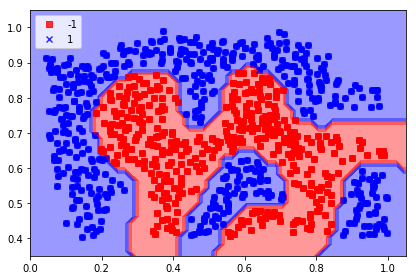

In [97]:
# C=1 , γ=100
for i in range(N):
    if int(labels[i]) == 1:
        plt.scatter(float(dataX[i][1]) , float(dataY[i][1]) , color='blue')
    if int(labels[i]) == -1:
        plt.scatter(float(dataX[i][1]) , float(dataY[i][1]) , color='red')


svclassifier = SVC(C=1 , gamma=100 , kernel='rbf')
svclassifier.fit(X,labels)

# Visualize the decision boundaries
plot_decision_regions(X, labels, classifier=svclassifier)
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlim(0,1.05)
plt.ylim(0.35,1.05)
plt.show()

In [88]:
from scipy.spatial import distance
dst = distance.euclidean

def rbfKernel(x , y , gamma):
    return np.exp(-100*dst(x, y)**2)
    

def rbf_scoring_function(x , supportVectors , alpha , bias , gamma):
    sum = 0
    for i in range(np.shape(alpha)[1]):
        sum += alpha[0][i] * (float(labels[i]) * rbfKernel(supportVectors[i] , x , gamma))    
    return ((sum+bias))

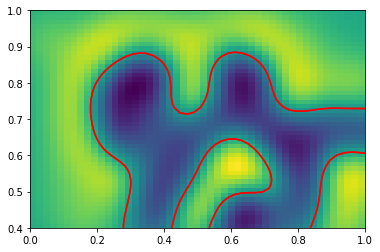

In [98]:
import pylab
xx = np.linspace(0,1,50)   #Κατασκευή Grid
yy = np.linspace(0.4,1,50)
Z = np.zeros([len(y) , len(x)])

for i in range(len(yy)):
    for j in range(len(xx)):
        Z[i][j] = rbf_scoring_function((x[j], y[i]) , svclassifier.support_vectors_ , svclassifier.dual_coef_ , svclassifier.intercept_ ,gamma=100)
        
pylab.pcolor(xx, yy, Z)   # Cost Surface
plt.contour(xx, yy, Z, [0, 0.001], colors='red')   # Zero-contour 

<br><br>**Άσκηση 2.β**
<br><br>

(C,gamma) = (1,1) --> number of Support Vectors = 617


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


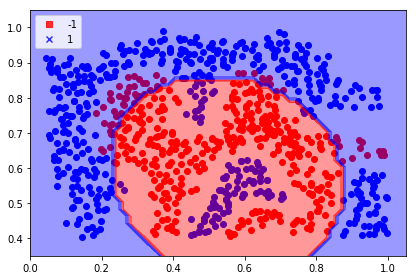

(C,gamma) = (1,10) --> number of Support Vectors = 401


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


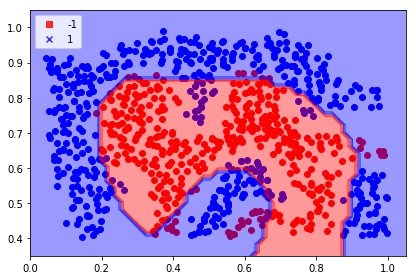

(C,gamma) = (1,100) --> number of Support Vectors = 157


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


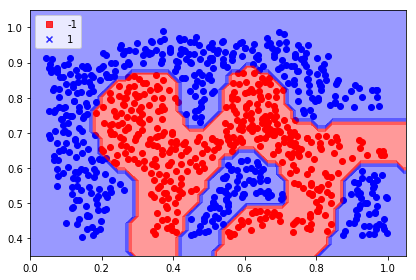

(C,gamma) = (1,1000) --> number of Support Vectors = 478


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


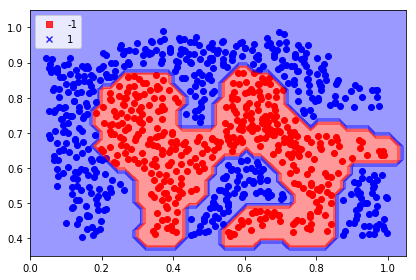

(C,gamma) = (1000,1) --> number of Support Vectors = 381


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


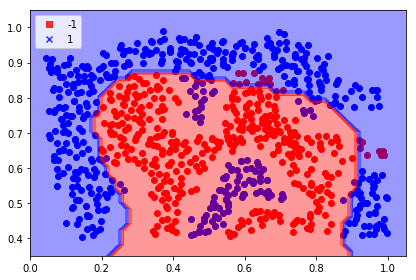

(C,gamma) = (1000,10) --> number of Support Vectors = 76


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


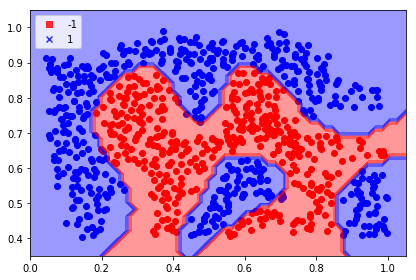

(C,gamma) = (1000,100) --> number of Support Vectors = 49


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


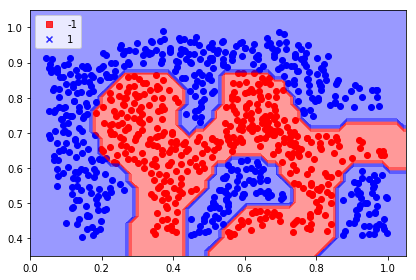

(C,gamma) = (1000,1000) --> number of Support Vectors = 463


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


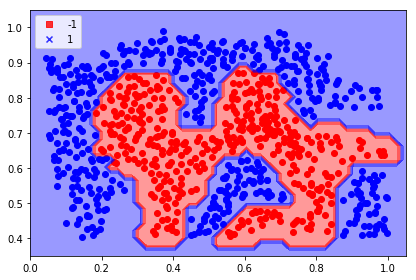

finish


In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Διαβάζω το dataset, το οποίο έχει ένα συγκεκριμέν format
# Διαβάζω γραμμή-γραμμή (εγγραφή-εγγραφή) το αρχείο και αποσπάω από κάθε formated γραμμή
# την κλάση στην οποία ανήκει η εγγραφή, την τιμή του χ άξονα και την τιμή του y άξονα της εγγραφής
file = open("d:/Documents/ml/hw5/homework5_SVM/ex2Data/ex2a.txt" , "r")

labels = []
dataX = []
dataY = []

lines = file.readlines()
N = np.shape(lines)[0]


for i in range(N):
    splittedLines = [lines[i].split()] # 1χ3
    labels.append(splittedLines[0][0])
    dataX.append(splittedLines[0][1].split("1:"))
    dataY.append(splittedLines[0][2].split("2:"))
file.close()


# Ζωγραφίζω τις decision boundaries για διάφορους συνδυασμούς των παραμέτρων C,gamma
C = [1,1000];
gamma = [1,10,100,1000];


for i in range(2):
    for j in range(4):
        svclassifier = SVC(C=C[i] , gamma=gamma[j] , kernel='rbf')
        svclassifier.fit(X,labels)
        
        print("(C,gamma) = (" + str(C[i]) + "," + str(gamma[j]) + ") --> number of Support Vectors = " + str(np.shape(svclassifier.support_vectors_)[0]))
        
        for k in range(N):
            if int(labels[k]) == 1:
                plt.scatter(float(dataX[k][1]) , float(dataY[k][1]) , color='blue')
            if int(labels[k]) == -1:
                plt.scatter(float(dataX[k][1]) , float(dataY[k][1]) , color='red')
        
        plot_decision_regions(X, labels, classifier=svclassifier)
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.xlim(0,1.05)
        plt.ylim(0.35,1.05)
        plt.show()
print("finish")

<br><br>**Άσκηση 2.γ**
<br><br>

(211, 2)
(211,)


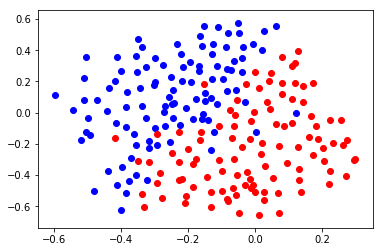

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Διαβάζω το dataset, το οποίο έχει ένα συγκεκριμέν format
# Διαβάζω γραμμή-γραμμή (εγγραφή-εγγραφή) το αρχείο και αποσπάω από κάθε formated γραμμή
# την κλάση στην οποία ανήκει η εγγραφή, την τιμή του χ άξονα και την τιμή του y άξονα της εγγραφής
file = open("d:/Documents/ml/hw5/homework5_SVM/ex2Data/ex2b.txt" , "r")

labels = []
dataX = []
dataY = []

lines = file.readlines()
N = np.shape(lines)[0]


for i in range(N):
    splittedLines = [lines[i].split()] # 1χ3
    labels.append(splittedLines[0][0])
    dataX.append(splittedLines[0][1].split("1:"))
    dataY.append(splittedLines[0][2].split("2:"))
file.close()


# Διαχωρίζω τις εγγραφές ανάλογα με την κλάση που ανήκουν και σχεδιάζω με άλλο χρώμα τις εγγραφές της κάθε κλάσης
for i in range(N):
    if int(labels[i]) == 1:
        plt.scatter(float(dataX[i][1]) , float(dataY[i][1]) , color='blue')
    if int(labels[i]) == -1:
        plt.scatter(float(dataX[i][1]) , float(dataY[i][1]) , color='red')


# Βάζω σε έναν πίνακα τα dataX,dataY
X = [[0 for x in range(2)] for y in range(N)]
for i in range(N):
    X[i][0] = dataX[i][1]
    X[i][1] = dataY[i][1]
print(np.shape(X))
print(np.shape(labels))

# Μετατρέπω τα X,labels από string σε float και int
for i in range(np.shape(X)[0]):
    for j in range(np.shape(X)[1]):
        X[i][j] = float(X[i][j])
for i in range(np.shape(X)[0]):
    labels[i] = int(labels[i])

X = np.array(X)
labels = np.array(labels)

In [9]:
import random

random.seed()
R = [[0 for x in range(1)] for y in range(211)]
for i in range(211):
    R[i] = random.randint(1,211)

X = np.random.permutation(X)
labels = np.random.permutation(labels)

In [10]:
# Χωρίζω τα δεδομένα σε 3 σετ {TrainSet , TestSet , ValidationSet}
n = 70
V1 = [[0 for x in range(2)] for y in range(n)] 
V2 = [[0 for x in range(2)] for y in range(n)] 
V3 = [[0 for x in range(2)] for y in range(n+1)] 
labelsV1 = [0 for x in range(n)]
labelsV2 = [0 for x in range(n)]
labelsV3 = [0 for x in range(n+1)]

for i in range(n):
    for j in range(2):
        V1[i][j] = X[i][j]
        labelsV1[i] = labels[i]
k = i + 1
for i in range(n):
    for j in range(2):
        V2[i][j] = X[k][j]
        labelsV2[i] = labels[k]
    k = k + 1
for i in range(n+1):
    for j in range(2):
        V3[i][j] = X[k][j]
        labelsV3[i] = labels[k]
    k = k + 1


# Βάζω σε έναν πίνακα τα Vi,labelsVi
V = [V1,V2,V3]
L = [labelsV1,labelsV2,labelsV3]

In [11]:
from sklearn.metrics import accuracy_score 

xAxes,yAxes = np.meshgrid(np.logspace(-1,3,5) , np.logspace(-1,3,5))
A = np.zeros(np.shape(xAxes)) # εδώ θα αποθηκεύσω την μέση ακρίβεια (mean accuracy) από κάθε συνδυασμό των C,γ
n = 3 # θα εφαρμόσω Cross Validation με fold=3

for i in range(np.shape(xAxes)[0]):
    for j in range(np.shape(yAxes)[1]):
        C = xAxes[i][j]
        gamma = yAxes[i][j]
        sigma = np.sqrt(0.5/gamma)
        acc = [0,0,0]
        
        for v in range(n): # cross-validation set index
            test_data = V[v]
            test_labels = L[v]
            
            # extract data from other sets
            train_data = []
            train_labels = []
            for otherset in range(n):
                if otherset != v:
                    train_data = [train_data , V[otherset]]
                    train_labels = [train_labels , L[otherset]]
                    
                    #print(train_labels);print("\n")
        
            # τώρα εκπαιδεύουμε το μοντέλο με τον εκάστοτε συνδυασμό των C,γ
            model = SVC(C=C , gamma=gamma , kernel='rbf')
            model.fit(train_data[1] , train_labels[1])
        
            # τώρα μετράμε την απόδοση του μοντέλου για τον εκάστοτε συνδυασμό των C,γ
            predicted_labels = model.predict(test_data)
            acc[v] = accuracy_score(test_labels , predicted_labels)
        # end for(v)
        
        avg_acc = np.mean(acc)
        A[i][j] = avg_acc
    # end for(j)
# end for(i)


# Αφού έχω εκπαιδεύσει ένα μοντέλο για διάφορους συνδιασμούς των παραμέτρων C,γ
# Τώρα ψάχνω να βρω ποιός συνδιασμός είναι ο πιο αποδοτικός, δηλ ποιός συνδιασμός έχει καλύτερη ακρίβεια
maximum = A[0][0]
max_i = 0
max_j = 0

for i in range(np.shape(A)[0]):
    for j in range(np.shape(A)[1]):
        if A[i][j] > maximum:
            maximum = A[i][j]
            max_i = i
            max_j = j


print("Best hyparameters are C = " + str(xAxes[max_i][max_j]) + " and γ = " + str(yAxes[max_i][max_j]))
print("For the best hyperparameters the score is " + str(A[max_i][max_j]))

Best hyparameters are C = 1.0 and γ = 100.0
For the best hyperparameters the score is 0.5639839034205232


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(211, 2)
(211,)


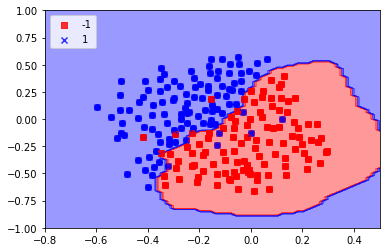

In [78]:
# Φορτώνω ξανά το dataset για να φτιάξω το μοντέλο με τα καλύτερα C,γ


import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# Διαβάζω το dataset, το οποίο έχει ένα συγκεκριμέν format
# Διαβάζω γραμμή-γραμμή (εγγραφή-εγγραφή) το αρχείο και αποσπάω από κάθε formated γραμμή
# την κλάση στην οποία ανήκει η εγγραφή, την τιμή του χ άξονα και την τιμή του y άξονα της εγγραφής
file = open("d:/Documents/ml/hw5/homework5_SVM/ex2Data/ex2b.txt" , "r")

labels = []
dataX = []
dataY = []

lines = file.readlines()
N = np.shape(lines)[0]


for i in range(N):
    splittedLines = [lines[i].split()] # 1χ3
    labels.append(splittedLines[0][0])
    dataX.append(splittedLines[0][1].split("1:"))
    dataY.append(splittedLines[0][2].split("2:"))
file.close()


# Διαχωρίζω τις εγγραφές ανάλογα με την κλάση που ανήκουν και σχεδιάζω με άλλο χρώμα τις εγγραφές της κάθε κλάσης
for i in range(N):
    if int(labels[i]) == 1:
        plt.scatter(float(dataX[i][1]) , float(dataY[i][1]) , color='blue')
    if int(labels[i]) == -1:
        plt.scatter(float(dataX[i][1]) , float(dataY[i][1]) , color='red')


# Βάζω σε έναν πίνακα τα dataX,dataY
X = [[0 for x in range(2)] for y in range(N)]
for i in range(N):
    X[i][0] = dataX[i][1]
    X[i][1] = dataY[i][1]
print(np.shape(X))
print(np.shape(labels))

# Μετατρέπω τα X,labels από string σε float και int
for i in range(np.shape(X)[0]):
    for j in range(np.shape(X)[1]):
        X[i][j] = float(X[i][j])
for i in range(np.shape(X)[0]):
    labels[i] = int(labels[i])

X = np.array(X)
labels = np.array(labels)


svclassifier = SVC(C=xAxes[max_i][max_j] , gamma=yAxes[max_i][max_j] , kernel='rbf')
svclassifier.fit(X,labels)

# Visualize the decision boundaries
plot_decision_regions(X, labels, classifier=svclassifier)
plt.legend(loc='upper left')
#plt.tight_layout()
plt.xlim(-0.8,0.5)
plt.ylim(-1,1)
plt.show()